In [83]:
from projector_func import getVector, make_image
from PIL import Image
import torch
from model import Generator
import matplotlib.pyplot as plt
from alignFace import *

In [70]:
# imgfile = '/home/vk352/FaceDetection/datasets/celeba/Img_cropped/test/1740/081768.jpg'
# 29981, 19917
imgfile = '/home/vk352/FaceDetection/datasets/data1024x1024/19917.jpg'

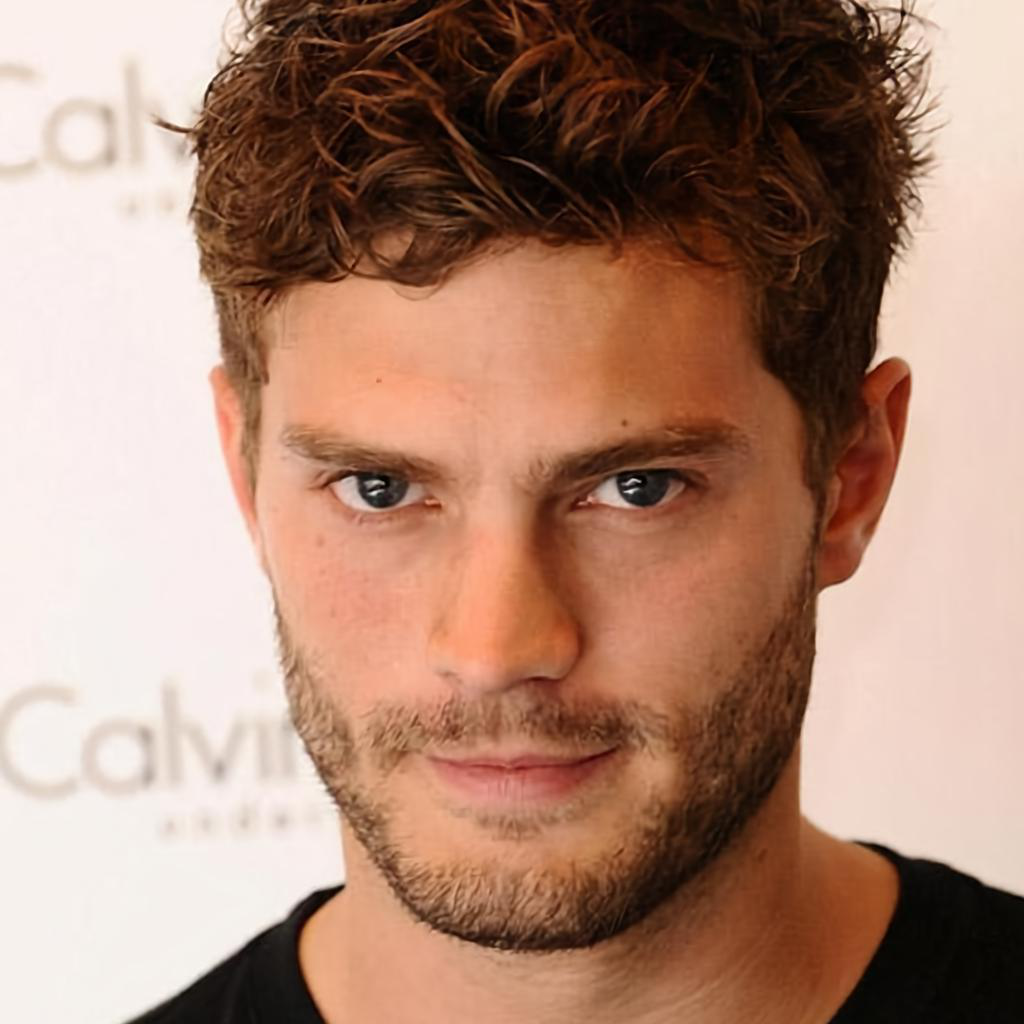

In [71]:
Image.open(imgfile).convert("RGB")

In [5]:
# g_ema, latent_path, noises = getVector('stylegan2-ffhq-config-f.pt', 1024, 
#                                        [imgfile])

Setting up Perceptual loss...


  0%|          | 0/1000 [00:00<?, ?it/s]

Loading model from: /home/vk352/FaceDetection/stylegan2-pytorch/lpips/weights/v0.1/vgg.pth
...[net-lin [vgg]] initialized
...Done


perceptual: 0.5296; noise regularize: 0.0925; mse: 0.3049; lr: 0.0000: 100%|██████████| 1000/1000 [02:37<00:00,  6.37it/s]


In [6]:
ckpt = 'stylegan2-ffhq-config-f.pt'
device = "cuda"
g_ema = Generator(1024, 512, 8)
g_ema.load_state_dict(torch.load(ckpt)["g_ema"], strict=False)
g_ema.eval()
g_ema = g_ema.to(device)

In [72]:
a = torch.load('results/19917.pt')

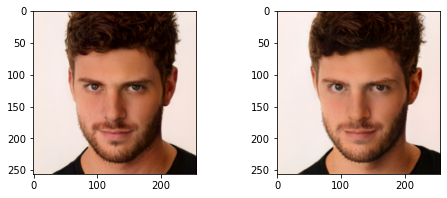

In [75]:
im1 = displayImg(g_ema, a['/home/vk352/FaceDetection/datasets/data1024x1024/19917.jpg']['path'][2]).resize((256,256))
im2 = displayImg(g_ema, a['/home/vk352/FaceDetection/datasets/data1024x1024/19917.jpg']['path'][-1]).resize((256,256))

plt.rcParams["figure.figsize"] = (8,3)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(im1)
axarr[1].imshow(im2)

In [75]:
def interpolate_hypersphere(v1, v2, num_steps):
    v1_norm = torch.norm(v1)
    v2_norm = torch.norm(v2)
    v2_normalized = v2 * (v1_norm / v2_norm)

    vectors = []
    for step in range(num_steps):
        interpolated = v1 + (v2_normalized - v1) * step / (num_steps - 1)
        interpolated_norm = torch.norm(interpolated)
        interpolated_normalized = interpolated * (v1_norm / interpolated_norm)
        vectors.append(interpolated_normalized)
    return torch.stack(vectors)

In [64]:
lat = []
for saved_file in ['000010', '001001']:
    a = torch.load(f'{saved_file}.pt')
    lat.append(a[f'/home/rw565/FaceDetection/aligned_images_for_test/{saved_file}.jpg']['latent'])

In [72]:
a = torch.load('results/all10.pt')

In [73]:
pairs = [('4128/075101.jpg', '5629/160782.jpg'),
('4238/074524.jpg', '9016/080252.jpg'),
('8155/027575.jpg', '1740/081768.jpg'),
('7904/083896.jpg', '9371/140376.jpg'),
('8921/066838.jpg', '1822/053991.jpg')]

In [81]:
for pair in pairs:
    vec1 = a[pair[0]]['latent']
    vec2 = a[pair[1]]['latent']
    vectors = interpolate_hypersphere(vec1, vec2, 50)
    
    fname = pair[0].replace('/', '-')+'_'+pair[1].replace('/', '-')
    
    img_gen, _ = g_ema([torch.unsqueeze(vectors[20], 0)], input_is_latent=True)
    img_ar = make_image(img_gen)
    pil_img = Image.fromarray(img_ar[0])
    pil_img.save('results/interpolated20/'+fname)
    
    img_gen, _ = g_ema([torch.unsqueeze(vectors[20], 0)], input_is_latent=True)
    img_ar = make_image(img_gen)
    pil_img = Image.fromarray(img_ar[0])
    pil_img.save('results/interpolated35/'+fname)

In [31]:
# vect.shape: 1*512
def displayImg(generator, vect):
    img_gen, _ = generator([vect], input_is_latent=True)
    img_ar = make_image(img_gen)
    pil_img = Image.fromarray(img_ar[0])
    
    return pil_img

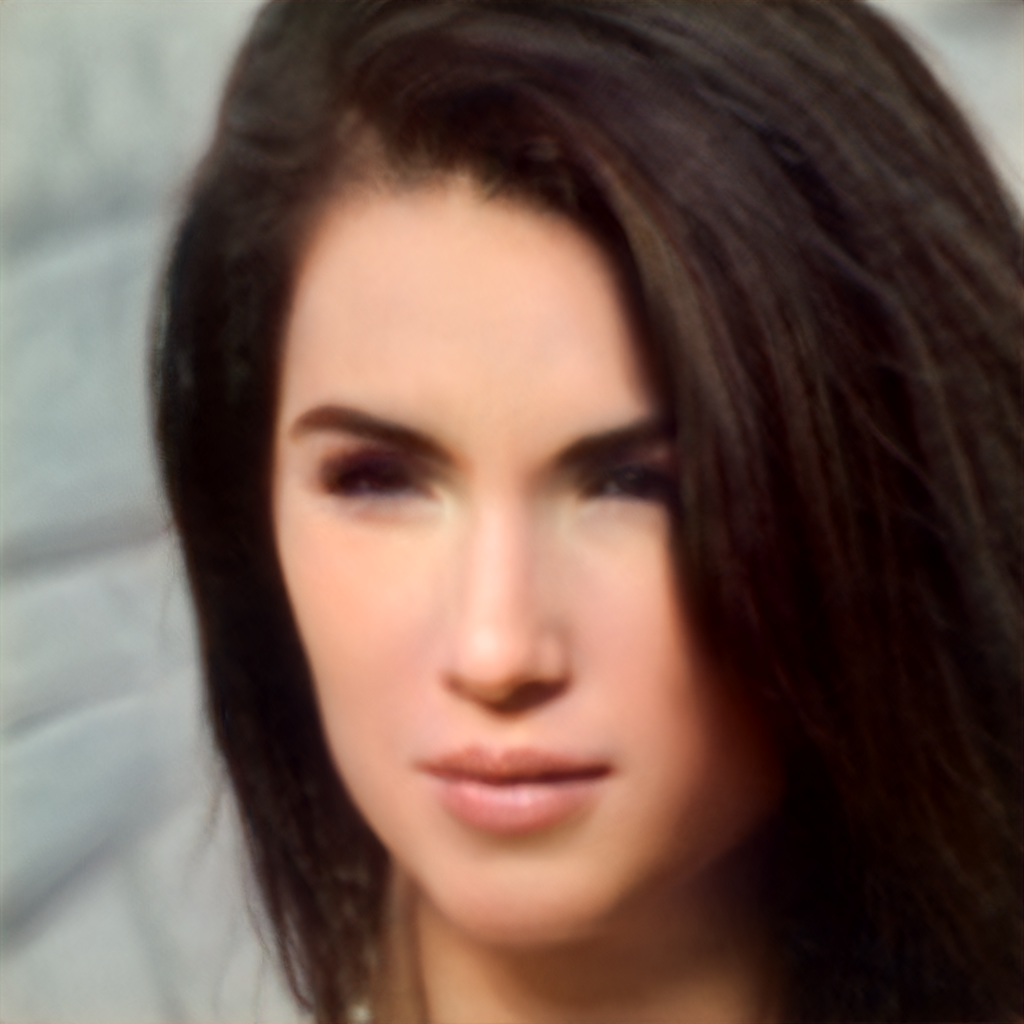

In [63]:
pil_img

In [90]:
img = align_face('/home/vk352/FaceDetection/datasets/sample/obama1.jpg')

Number of faces detected: 1
Detection 0: Left: 282 Top: 82 Right: 411 Bottom: 211
Part 0: (284, 124), Part 1: (284, 142) ...


In [91]:
img.save('/home/vk352/FaceDetection/datasets/sample/obama1_aligned.jpg')